<a href="https://colab.research.google.com/github/louiseseeyave/ICIC_Data_Analysis/blob/main/Supernova_LFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np
from scipy import constants
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(font_scale=1.75, rc={'text.usetex': False})

The functions

In [ ]:
def eta(a, omega_m):
    """
    Function to compute the eta parameter
    """
    
    # First, compute the s parameter
    s = np.cbrt((1 - omega_m) / omega_m)

    return 2 * np.sqrt(s**3 + 1) * (1 / (a ** 4) - 0.1540 * s / (a ** 3) + 
    0.4304 * s ** 2 / (a ** 2) + 0.19097 * s ** 3 / a + 0.066941 * s ** 4) ** (-1 / 8)
    

def luminosity_distance(z, h, omega_m):
    """
    Function to compute the luminosity distance D_L(z) as a function of redshift,
    reduced Hubble constant h, and the matter density omega_m
    """
    # Calculate the value of H0 in SI units given h
    H0 = (100 * h * 1_000 / (1_000_000 * constants.parsec))

    return (constants.c / H0) * (1 + z) * (eta(1, omega_m) - eta(1 / (1 + z), omega_m))


def distance_modulus(z, h, omega_m):
    """
    Function to compute the distance modulus (mu) given an input redshift z, and
    Hubble parameter h
    """
    return 25 - 5 * np.log10(h) + 5 * np.log10(luminosity_distance(z, 1, omega_m) / (1_000_000 * constants.parsec))


def generate_data(z_array, covariance, h, omega_m):
    """
    Function to generate our mock data vector given an input redshift array,
    covariance matrix for the noise, and cosmology parameters h and omega_m 
    """ 
    theory_data = distance_modulus(z_array, h, omega_m)

    # Compute noise
    theory_noise = np.random.multivariate_normal(np.zeros_like(z_array), covariance)

    return theory_data + theory_noise


First, let us read in the supernova data and its covariance matrix

In [ ]:
z_data, mu_data = np.loadtxt('jla_mub.txt').T

# Get the number of supernova in the sample
n_samples = len(z_data)

# Load in covariance matrix and reshape it to make it square 
cov_mat = np.loadtxt('jla_mub_covmatrix.txt').reshape([n_samples, n_samples])

First, let us plot the data of the distance modulus as a function of redshift

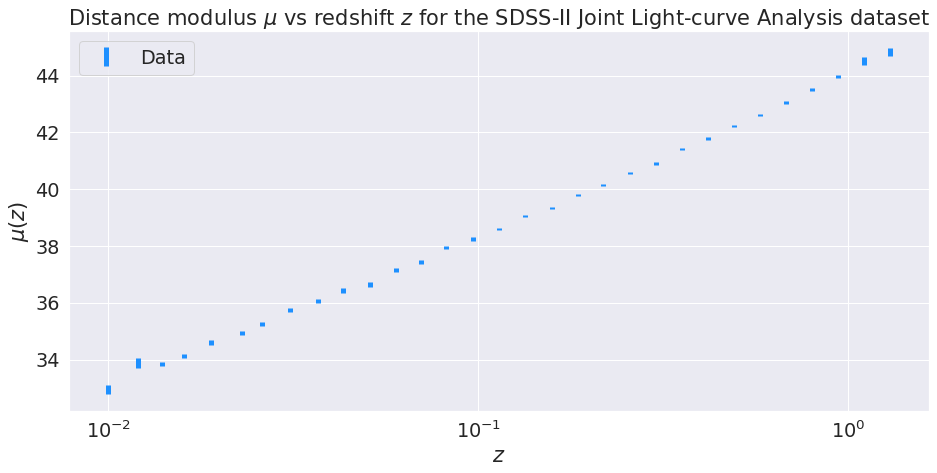

In [ ]:

# Plot the data & theoretical prediction for h = 0.7
fig, ax = plt.subplots(figsize=(14, 7))

# ax.semilogx(z_data, mu_data, '.', label='Data', c='cornflowerblue', ms=7, mew=4)
ax.errorbar(z_data, mu_data, yerr=np.sqrt(np.diag(cov_mat)), ls='none', c='dodgerblue', label='Data', lw=5)

ax.set_xscale('log')
ax.set_title('Distance modulus $\mu$ vs redshift $z$ for the SDSS-II Joint Light-curve Analysis dataset')
ax.set_xlabel('$z$')
ax.set_ylabel('$\mu(z)$')
ax.legend()
plt.tight_layout()
plt.show()
